In [48]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az
import numpy as np

Lab 3 Karolina Woźniak

Task 1

In [49]:
gen_quant = CmdStanModel(stan_file='/home/Data_Analyticts_2023/Lab3/code1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [50]:
sample_num = 1000
samples = gen_quant.sample( fixed_param=True, 
                            iter_sampling=sample_num, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


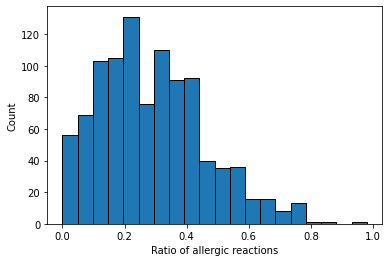

In [51]:
#Computing ratio of allergic reactions for each sample and create a histogram.
df = samples.draws_pd()

ratios = df['y'] / df['N']
plt.hist(ratios, bins=20, edgecolor = 'black')
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Count')
plt.show()

In [52]:
np.mean(ratios)

0.28834

Mean of the ratio is consistent with prior knowledge.  We can conclude that the prior is a reasonable representation of our knowledge. 


Task 2

In [53]:
model = CmdStanModel(stan_file='/home/Data_Analyticts_2023/Lab3/code2.stan')
N = 50
y = 10
samples2 = model.sample(data={'N': N, 'y': y}, fixed_param=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:title={'center':'x'}>

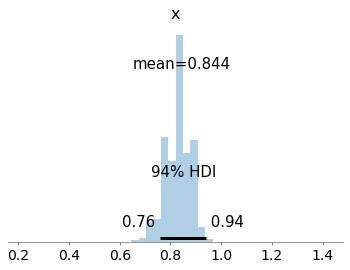

In [68]:
df2 = samples2.draws_pd()
ratio = df2['y_pred']/N
ratio = np.array(ratio)
az.plot_posterior(ratio, kind='hist', round_to=3)

In [72]:
ev = np.mean(ratio)
ratio_hdi = np.percentile(ratio, [3, 97])

# compute the expected value of the predicted ratio
ratio_mean = np.mean(ratio)

# compute the probability that ratio is lower than the average probability from traditional vaccines
traditional_prob = 0.05  # average probability from traditional vaccines
ratio_prob = np.mean(ratio < traditional_prob)

# print the results
print(f"Predicted ratio 94% HDI: {ratio_hdi}")
print(f"Predicted ratio mean: {ratio_mean}")
print(f"Probability of ratio < {traditional_prob}: {ratio_prob}")

Predicted ratio 94% HDI: [0.74 0.92]
Predicted ratio mean: 0.8441600000000001
Probability of ratio < 0.05: 0.0
